# Examples for Day 2

In [1]:
# initialization
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
# %load ml15.py
# Feature Selection with Univariate Selection
from pandas import read_csv
from sklearn.feature_selection import SelectKBest
# load data
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
selector = SelectKBest(k=4)
features = selector.fit_transform(X, y)
selected = selector.get_support()
# Show selected features
print([header[i] for i, j in enumerate(selected) if j])


['preg', 'plas', 'mass', 'age']


In [4]:
selected

array([ True,  True, False, False, False,  True, False,  True])

In [8]:
# %load ml16.py
# Model-based Feature Selection with Random Forest
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=names)
array = df.values
X = array[:, :-1]
y = array[:, -1]
selector = SelectFromModel(RandomForestClassifier(), threshold='median')
features = selector.fit_transform(X, y)
selected = selector.get_support()
# Show selected features
print([names[i] for i in range(len(names)-1) if selected[i]])


['plas', 'mass', 'pedi', 'age']


In [11]:
# %load ml17.py
# Feature Selection with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
model = DecisionTreeClassifier()
rfe = RFE(model, n_features_to_select=4)
features = rfe.fit_transform(X, y)
selected = rfe.get_support()
# Show selected features
print([header[i] for i, j in enumerate(selected) if j])


['plas', 'mass', 'pedi', 'age']


In [13]:
# %load ml18.py
# Evaluate using a train and a test set
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
# Split into training and testing sets
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(f"Accuracy: {result:.2%}")


Accuracy: 70.08%


In [19]:
import numpy as np
u, c = np.unique(y, return_counts=True)
print(u, c/len(y), sep=",")

u_train, c_train = np.unique(y_train, return_counts=True)
print(u_train, c_train/len(y_train), sep=",")

u_test, c_test = np.unique(y_test, return_counts=True)
print(u_test, c_test/len(y_test), sep=",")

[0 1],[0.65104167 0.34895833]
[0 1],[0.6459144 0.3540856]
[0 1],[0.66141732 0.33858268]


In [21]:
# %load ml19.py
# Evaluate using a train and a test set
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
# Split into training and testing sets
X_train, X_test, y_train, y_test = split(X, y, stratify=y, test_size=0.33, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(f"Accuracy: {result:.2%}")


Accuracy: 72.44%


In [22]:
u, c = np.unique(y, return_counts=True)
print(u, c/len(y), sep=",")

u_train, c_train = np.unique(y_train, return_counts=True)
print(u_train, c_train/len(y_train), sep=",")

u_test, c_test = np.unique(y_test, return_counts=True)
print(u_test, c_test/len(y_test), sep=",")

[0 1],[0.65104167 0.34895833]
[0 1],[0.65175097 0.34824903]
[0 1],[0.6496063 0.3503937]


In [24]:
# %load ml20.py
# Evaluate using Cross Validation
from pandas import read_csv
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
model = KNeighborsClassifier()
# Create 3 partitions
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
# Perform 3-fold cross-validation
results = cross_val_score(model, X, y, cv=kfold)
print(f"Accuracy: {results.mean():.2%} ({results.std():.2%})")


Accuracy: 72.14% (1.92%)


In [26]:
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier

df = read_csv("data/rescale.csv")
df.head()

,feature1,feature2,label
0,-4.083310,-10963.008707,0
1,0.751363,-7153.781270,1
2,5.706203,-7830.473386,1
3,-6.522791,-9145.506169,0
4,-7.362259,2846.910782,2


In [27]:
df.describe()

,feature1,feature2,label
count,300.000000,300.000000,300.000000
mean,-3.112509,-5458.703355,1.000000
std,5.260577,5641.865215,0.817861
min,-14.482280,-14742.240961,0.000000
25%,-7.036305,-9750.407678,0.000000
50%,-4.439516,-7862.241840,1.000000
75%,1.833269,611.843991,2.000000
max,8.907468,6395.905063,2.000000


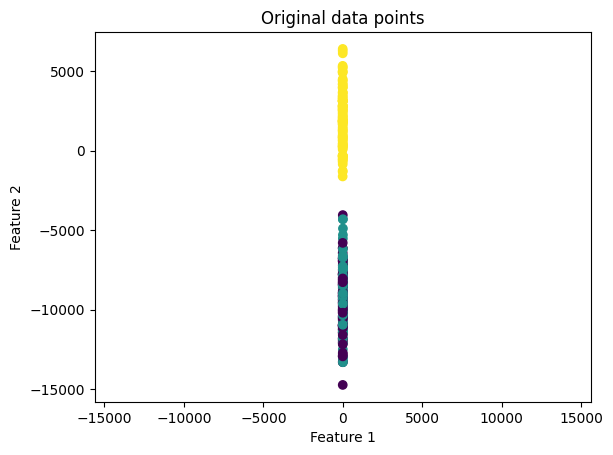

In [29]:
# Plot features
plt.scatter(df["feature1"], df["feature2"], c=df["label"])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original data points")
plt.axis("equal")
plt.show()

In [30]:
X = df.drop(columns=["label"])
y = df["label"]

X1_train, X1_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)

knn1 = KNeighborsClassifier().fit(X1_train, y_train)
print(f"knn1 accuracy: {knn1.score(X1_test, y_test):.3%}")

knn1 accuracy: 66.667%


In [31]:
scaler = MinMaxScaler()
X2_train = scaler.fit_transform(X1_train)
X2_test = scaler.transform(X1_test)

knn2 = KNeighborsClassifier().fit(X2_train, y_train)
print(f"knn2 accuracy: {knn2.score(X2_test, y_test):.3%}")

knn2 accuracy: 98.667%


In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split as split
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

X, y = load_breast_cancer(return_X_y=True)
X.shape, np.unique(y)

((569, 30), array([0, 1]))

In [33]:
X1_train, X1_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)

knn1 = KNeighborsClassifier().fit(X1_train, y_train)
print(f"knn1 accuracy: {knn1.score(X1_test, y_test):.3%}")

knn1 accuracy: 96.503%


In [34]:
selector = RFE(RandomForestClassifier(), n_features_to_select=10)
X2_train = selector.fit_transform(X1_train, y_train)
X2_test = selector.transform(X1_test)

knn2 = KNeighborsClassifier().fit(X2_train, y_train)
print(f"knn2 accuracy: {knn2.score(X2_test, y_test):.3%}")

knn2 accuracy: 95.105%


In [37]:
from joblib import dump
dump(knn1, "knn1.job")
dump(knn2, "knn2.job")

['knn2.job']

In [40]:
from joblib import load
model1 = load("knn1.job")
print(model1.score(X1_test, y_test))
model1.predict([X1_test[1]])

0.965034965034965


array([0])